In [1]:
import pandas as pd
import numpy as np

In [2]:
df_reason = pd.read_csv('/content/drive/MyDrive/Data United/reason.csv')
df_sentiment = pd.read_csv('/content/drive/MyDrive/Data United/sentiment_statistics.csv')
df_calls = pd.read_csv('/content/drive/MyDrive/Data United/calls.csv')
df_customer = pd.read_csv('/content/drive/MyDrive/Data United/customers.csv')

In [ ]:
df_calls.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


In [3]:
df_calls = df_calls.drop(['call_transcript'],axis=1)

In [4]:
df_sentiment.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [5]:
len(df_sentiment)

71810

In [6]:
df_reason.head()

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [7]:
len(df_reason)

66653

In [8]:
df_customer.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [9]:
len(df_customer)

71810

In [10]:
import re
def remove_punctuation(text):
    text = re.sub(r"-", " ", text)
    text = text.strip()
    pattern = re.compile(r'\s+')
    text = re.sub(pattern, '', text)
    return text

In [11]:
df_reason['primary_call_reason'] = df_reason['primary_call_reason'].map(lambda x: x.lower())
df_reason['primary_call_reason'] = df_reason['primary_call_reason'].map(lambda x: remove_punctuation(x))

In [12]:
df_reason.value_counts('primary_call_reason')

,count
primary_call_reason,
irrops,13311
voluntarychange,10848
seating,6365
mileageplus,5851
postflight,4330
communications,3840
productsandservices,2856
baggage,2832
upgrade,2738


In [13]:
df_merged = pd.merge(df_sentiment, df_reason, how='inner', on='call_id')

In [14]:
df_merged_1 = pd.merge(df_calls, df_customer, how='inner', on='customer_id')

In [15]:
df_merged_1.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,customer_name,elite_level_code
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,Matthew Foster,4.0
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,Tammy Walters,NaN
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,Jeffery Dixon,NaN
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,David Wilkins,2.0
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,Elizabeth Daniels,0.0


In [16]:
df_merged.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason
0,4667960400,963118,neutral,angry,-0.04,0.39,voluntarycancel
1,1122072124,519057,calm,neutral,0.02,0.35,booking
2,6834291559,158319,neutral,polite,-0.13,0.32,irrops
3,2266439882,488324,neutral,frustrated,-0.20,0.20,upgrade
4,1211603231,721730,neutral,polite,-0.05,0.35,seating


In [17]:
df = pd.merge(df_merged, df_merged_1, how='inner',on='call_id')

In [18]:
df.head()

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_id,agent_id_y,call_start_datetime,agent_assigned_datetime,call_end_datetime,customer_name,elite_level_code
0,4667960400,963118,neutral,angry,-0.04,0.39,voluntarycancel,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,Matthew Foster,4.0
1,1122072124,519057,calm,neutral,0.02,0.35,booking,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,Tammy Walters,NaN
2,6834291559,158319,neutral,polite,-0.13,0.32,irrops,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,Jeffery Dixon,NaN
3,2266439882,488324,neutral,frustrated,-0.20,0.20,upgrade,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,David Wilkins,2.0
4,1211603231,721730,neutral,polite,-0.05,0.35,seating,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,Elizabeth Daniels,0.0


In [19]:
df = df.drop(['agent_id_y'],axis=1)
df.rename(columns={'agent_id_x': 'agent_id'}, inplace=True)

In [20]:
df.columns

Index(['call_id', 'agent_id', 'agent_tone', 'customer_tone',
       'average_sentiment', 'silence_percent_average', 'primary_call_reason',
       'customer_id', 'call_start_datetime', 'agent_assigned_datetime',
       'call_end_datetime', 'customer_name', 'elite_level_code'],
      dtype='object')

In [21]:
len(df)

66653

In [22]:
df.isnull().sum()

,0
call_id,0
agent_id,0
agent_tone,198
customer_tone,0
average_sentiment,101
silence_percent_average,0
primary_call_reason,0
customer_id,0
call_start_datetime,0
agent_assigned_datetime,0


In [25]:
df['agent_tone'] = df['agent_tone'].apply(lambda x: x.lower())
df['agent_tone'] = df['agent_tone'].fillna('Neutral')
df['average_sentiment'] = df['average_sentiment'].fillna(0)

In [24]:
df['agent_tone'].value_counts()

,count
agent_tone,
neutral,39688
calm,22882
frustrated,3438
angry,366
polite,81


In [26]:
df['customer_tone'].value_counts()

,count
customer_tone,
neutral,13402
polite,13397
angry,13351
calm,13278
frustrated,13225


In [27]:
def tolower(text):
  return text.lower()

In [28]:
from sklearn.preprocessing import OrdinalEncoder

df['customer_tone'] = df['customer_tone'].map(lambda x: tolower(x))
df['agent_tone'] = df['agent_tone'].map(lambda x: tolower(x))

categories = [['neutral', 'polite', 'calm', 'frustrated', 'angry']]
encoder = OrdinalEncoder(categories=categories)

df['customer_tone'] = encoder.fit_transform(df[['customer_tone']])
df['agent_tone'] = encoder.fit_transform(df[['agent_tone']])

In [29]:
df.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,customer_name,elite_level_code
0,4667960400,963118,0.0,4.0,-0.04,0.39,voluntarycancel,2033123310,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,Matthew Foster,4.0
1,1122072124,519057,2.0,0.0,0.02,0.35,booking,8186702651,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,Tammy Walters,NaN
2,6834291559,158319,0.0,1.0,-0.13,0.32,irrops,2416856629,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,Jeffery Dixon,NaN
3,2266439882,488324,0.0,3.0,-0.20,0.20,upgrade,1154544516,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,David Wilkins,2.0
4,1211603231,721730,0.0,1.0,-0.05,0.35,seating,5214456437,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,Elizabeth Daniels,0.0


In [30]:
df['primary_call_reason'] = df['primary_call_reason'].map(lambda x: remove_punctuation(x))

In [31]:
df['primary_call_reason'] = df['primary_call_reason'].replace('etc','other')
df['primary_call_reason'] = df['primary_call_reason'].replace('othertopics','other')
df['primary_call_reason'] = df['primary_call_reason'].replace('productsandservices','products&services')

In [32]:
df['primary_call_reason'].value_counts()

,count
primary_call_reason,
irrops,13311
voluntarychange,10848
seating,6365
mileageplus,5851
postflight,4330
communications,3840
products&services,3332
baggage,2832
upgrade,2738


In [33]:
df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'])
df['agent_assigned_datetime'] = pd.to_datetime(df['agent_assigned_datetime'])
df['call_end_datetime'] = pd.to_datetime(df['call_end_datetime'])

df['AHT'] = (df['call_end_datetime'] - df['call_start_datetime']).dt.total_seconds() / 60

df['AST'] = (df['agent_assigned_datetime']-df['call_start_datetime']).dt.total_seconds() / 60

In [34]:
freq = df['primary_call_reason'].value_counts()

most_frequent_reason = freq.idxmax()
least_frequent_reason = freq.idxmin()

aht_by_reason = df.groupby('primary_call_reason')['AHT'].mean()

most_frequent_aht = aht_by_reason[most_frequent_reason]
least_frequent_aht = aht_by_reason[least_frequent_reason]
percentage_difference = ((most_frequent_aht - least_frequent_aht) / least_frequent_aht) * 100

print("Most Frequent reson is {}".format(most_frequent_reason))
print("Least Frequent reson is {}".format(least_frequent_reason))
print("Most Frequent AHT is {}".format(most_frequent_aht))
print("Least Frequent AHT is {}".format(least_frequent_aht))
print("Percentage Difference is {}".format(percentage_difference))

Most Frequent reson is irrops
Least Frequent reson is unaccompaniedminor
Most Frequent AHT is 19.086620088648488
Least Frequent AHT is 20.125
Percentage Difference is -5.159651733423664


In [ ]:
df['primary_call_reason'] = df['primary_call_reason'].replace(['irrops', 'voluntarychange', 'schedulechange', 'voluntarycancel'],'Flight Changes')
df['primary_call_reason'] = df['primary_call_reason'].replace(['seating', 'upgrade'],'Seat Preferences & Upgrades')
df['primary_call_reason'] = df['primary_call_reason'].replace(['mileageplus', 'products&services'],'Loyalty Program & Membership')
df['primary_call_reason'] = df['primary_call_reason'].replace(['postflight', 'baggage'],'Post-Flight Issues')
df['primary_call_reason'] = df['primary_call_reason'].replace(['booking', 'checkin', 'checkout'],'Booking and Boarding')
df['primary_call_reason'] = df['primary_call_reason'].replace(['communications', 'digitalsupport', 'travelerupdates'],'Customer Support')
df['primary_call_reason'] = df['primary_call_reason'].replace(['disability', 'unaccompaniedminor'],'Special Services')
df['primary_call_reason'] = df['primary_call_reason'].replace(['other'],'Other')

In [ ]:
df['primary_call_reason'].value_counts()

,count
primary_call_reason,
Flight Changes,26497
Loyalty Program & Membership,9183
Seat Preferences & Upgrades,9103
Post-Flight Issues,7162
Booking and Boarding,6429
Customer Support,6002
Other,1770
Special Services,507


In [ ]:
df = pd.concat([df,pd.get_dummies(df['primary_call_reason'])],axis=1)

In [ ]:
df.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_id,call_start_datetime,agent_assigned_datetime,...,AHT,AST,Booking and Boarding,Customer Support,Flight Changes,Loyalty Program & Membership,Other,Post-Flight Issues,Seat Preferences & Upgrades,Special Services
0,4667960400,963118,0.0,4.0,-0.04,0.39,Flight Changes,2033123310,2024-07-31 23:56:00,2024-08-01 00:03:00,...,38.0,7.0,False,False,True,False,False,False,False,False
1,1122072124,519057,2.0,0.0,0.02,0.35,Booking and Boarding,8186702651,2024-08-01 00:03:00,2024-08-01 00:06:00,...,15.0,3.0,True,False,False,False,False,False,False,False
2,6834291559,158319,0.0,1.0,-0.13,0.32,Flight Changes,2416856629,2024-07-31 23:59:00,2024-08-01 00:07:00,...,27.0,8.0,False,False,True,False,False,False,False,False
3,2266439882,488324,0.0,3.0,-0.20,0.20,Seat Preferences & Upgrades,1154544516,2024-08-01 00:05:00,2024-08-01 00:10:00,...,12.0,5.0,False,False,False,False,False,False,True,False
4,1211603231,721730,0.0,1.0,-0.05,0.35,Seat Preferences & Upgrades,5214456437,2024-08-01 00:04:00,2024-08-01 00:14:00,...,19.0,10.0,False,False,False,False,False,False,True,False


In [ ]:
elite = df[df['elite_level_code'].notnull()]
non_elite = df[df['elite_level_code'].isnull()]
print("elite member count- {}".format(len(elite)))
print("non-elite member count- {}".format(len(non_elite)))

elite member count- 42694
non-elite member count- 23959


In [ ]:
elite.to_csv('elite.csv')
non_elite.to_csv('non_elite.csv')

In [ ]:
corr = df[['average_sentiment','silence_percent_average']].corr(method = 'pearson')
corr

,average_sentiment,silence_percent_average
average_sentiment,1.000000,0.034833
silence_percent_average,0.034833,1.000000


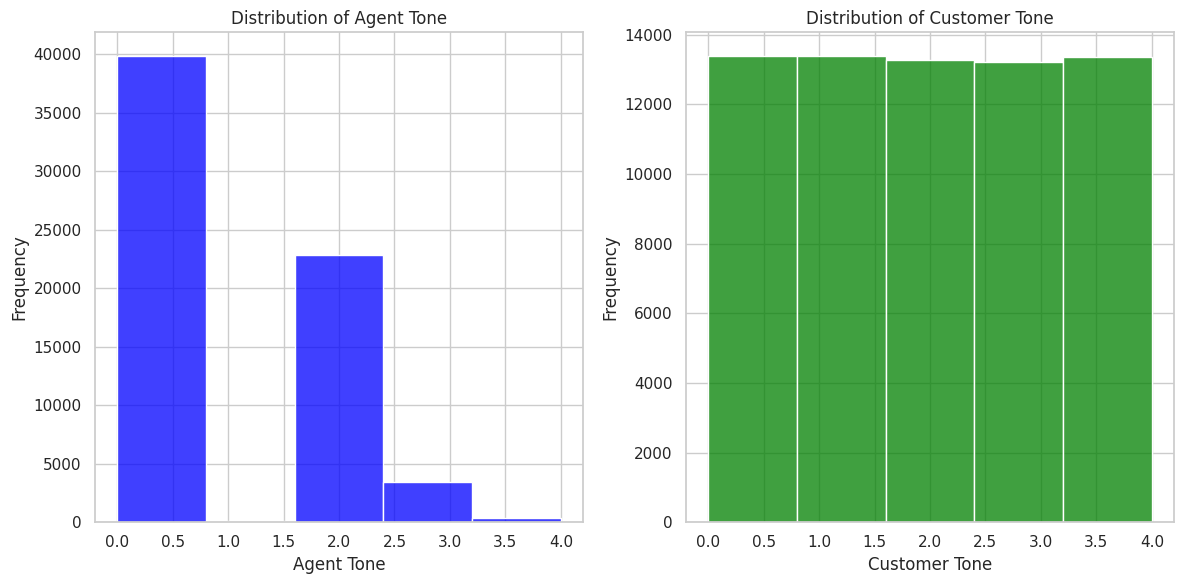

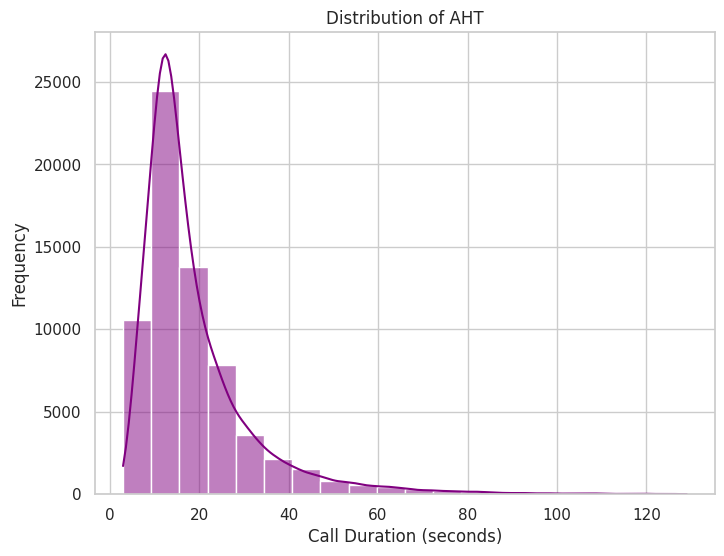

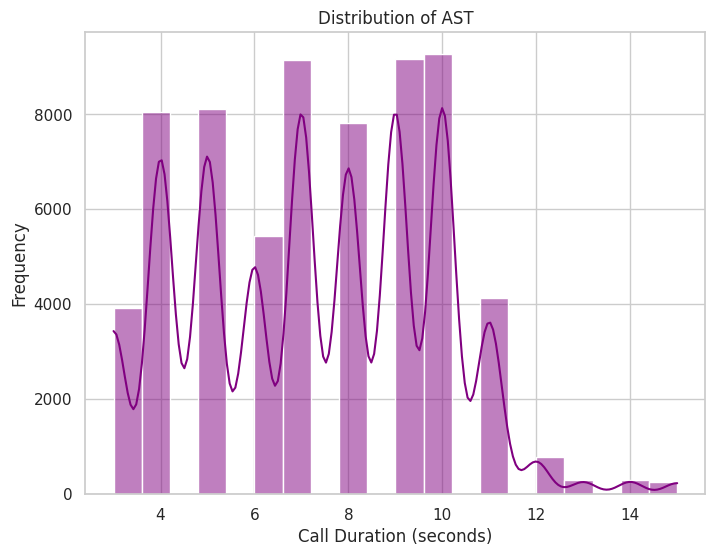

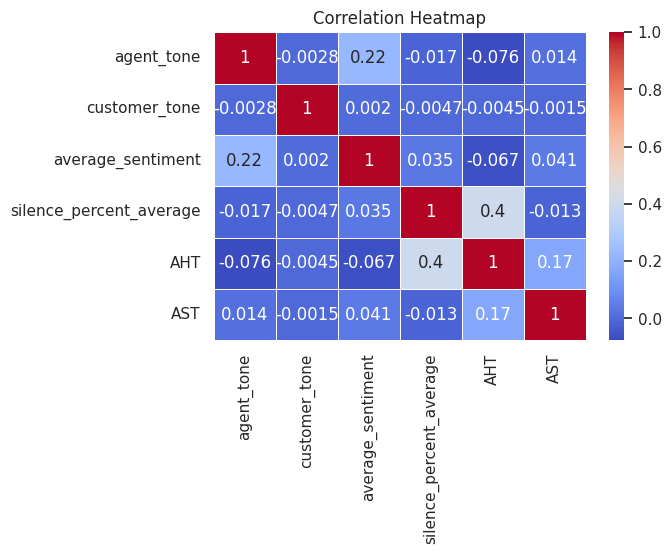

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['agent_tone'], bins=5, kde=False, color='blue')
plt.title('Distribution of Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['customer_tone'], bins=5, kde=False, color='green')
plt.title('Distribution of Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['AHT'], bins=20, kde=True, color='purple')
plt.title('Distribution of AHT')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['AST'], bins=20, kde=True, color='purple')
plt.title('Distribution of AST')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 4))
correlation_matrix = df[['agent_tone', 'customer_tone', 'average_sentiment',
                                 'silence_percent_average', 'AHT','AST']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [36]:
agent_performance = df.groupby('agent_id').agg({
    'AHT': 'mean',
    'silence_percent_average': 'mean',
    'agent_tone': lambda x: x.mode()[0],
    'average_sentiment': 'mean'
}).reset_index()

silence_aht_correlation = df['silence_percent_average'].corr(df['AHT'])

tone_aht = df.groupby(['agent_tone', 'customer_tone'])['AHT'].mean().reset_index()

sentiment_aht_correlation = df['average_sentiment'].corr(df['AHT'])

agent_performance.head(), silence_aht_correlation, tone_aht, sentiment_aht_correlation



(   agent_id        AHT  silence_percent_average  agent_tone  average_sentiment
 0    102574  68.000000                 0.260000         0.0          -0.075000
 1    103651  19.395760                 0.292827         0.0          -0.025194
 2    106000  19.405941                 0.275644         0.0          -0.029901
 3    107876  24.333333                 0.405000         0.0          -0.065000
 4    112609  24.125000                 0.348750         0.0          -0.023750,
 0.4000661283337691,
     agent_tone  customer_tone        AHT
 0          0.0            0.0  19.887553
 1          0.0            1.0  19.563201
 2          0.0            2.0  19.751507
 3          0.0            3.0  19.620453
 4          0.0            4.0  19.676602
 5          1.0            0.0  11.562500
 6          1.0            1.0  10.000000
 7          1.0            2.0  11.266667
 8          1.0            3.0  10.875000
 9          1.0            4.0  13.562500
 10         2.0            0.0  17.8

In [37]:
df['hour_of_day'] = df['call_start_datetime'].dt.hour
df['day_of_week'] = df['call_start_datetime'].dt.dayofweek

In [ ]:
df.to_csv('idata.csv')

In [38]:
df.columns


Index(['call_id', 'agent_id', 'agent_tone', 'customer_tone',
       'average_sentiment', 'silence_percent_average', 'primary_call_reason',
       'customer_id', 'call_start_datetime', 'agent_assigned_datetime',
       'call_end_datetime', 'customer_name', 'elite_level_code', 'AHT', 'AST',
       'hour_of_day', 'day_of_week'],
      dtype='object')

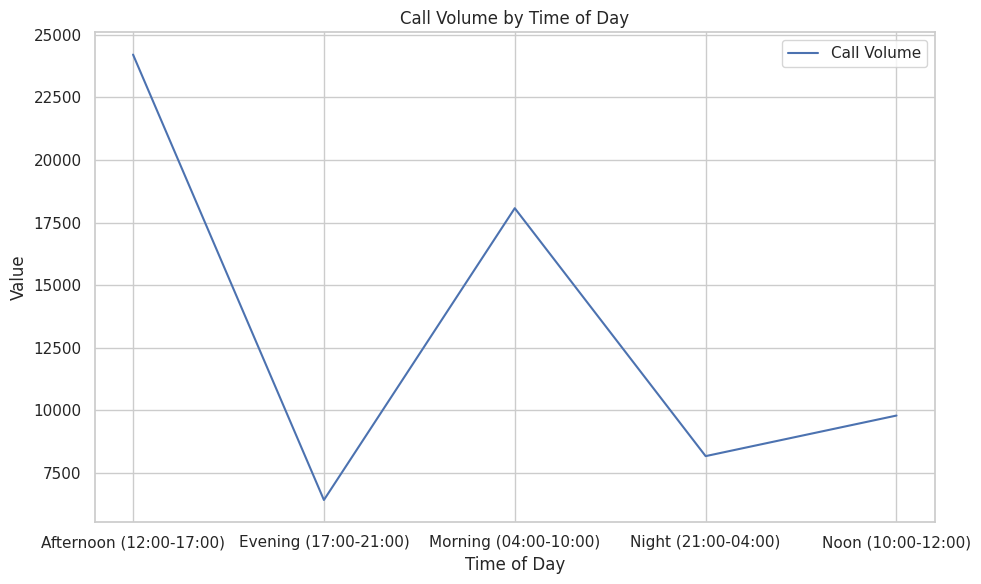

Correlation between call volume and AHT: -0.38971227723395774
Correlation between call volume and AST: 0.23811757004136114


In [40]:
def categorize_time_of_day(timestamp):
  timestamp = pd.to_datetime(timestamp)
  hour = timestamp.hour
  if 21 <= hour <= 23 or 0 <= hour <= 4:
    return 'Night (21:00-04:00)'
  elif 4 < hour <= 10:
    return 'Morning (04:00-10:00)'
  elif 10 < hour <= 12:
    return 'Noon (10:00-12:00)'
  elif 12 < hour <= 17:
    return 'Afternoon (12:00-17:00)'
  else:
    return 'Evening (17:00-21:00)'

df1 = df.copy()
df1['time_of_day'] = df['call_start_datetime'].apply(categorize_time_of_day)

aht_ast_by_time = df1.groupby('time_of_day').agg({'AHT': 'mean', 'AST': 'mean'}).reset_index()

call_volume_by_time = df1.groupby('time_of_day')['call_id'].count().reset_index()

analysis_df = pd.merge(call_volume_by_time, aht_ast_by_time, on='time_of_day')

analysis_df = analysis_df.rename(columns={'call_id': 'call_volume'})

correlation_volume_aht = analysis_df['call_volume'].corr(analysis_df['AHT'])
correlation_volume_ast = analysis_df['call_volume'].corr(analysis_df['AST'])


# Visualize the relationship
plt.figure(figsize=(10, 6))
plt.plot(analysis_df['time_of_day'], analysis_df['call_volume'], label='Call Volume')
plt.title('Call Volume by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

# Print the correlations
print(f"Correlation between call volume and AHT: {correlation_volume_aht}")
print(f"Correlation between call volume and AST: {correlation_volume_ast}")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


X = df.drop(columns=['call_id', 'AHT', 'call_start_datetime', 'agent_id','customer_id','agent_assigned_datetime','call_end_datetime','primary_call_reason','customer_name'],axis=1)
y = df['AHT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Model evaluation
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 4.356125031609688
Test RMSE: 11.669381820423585


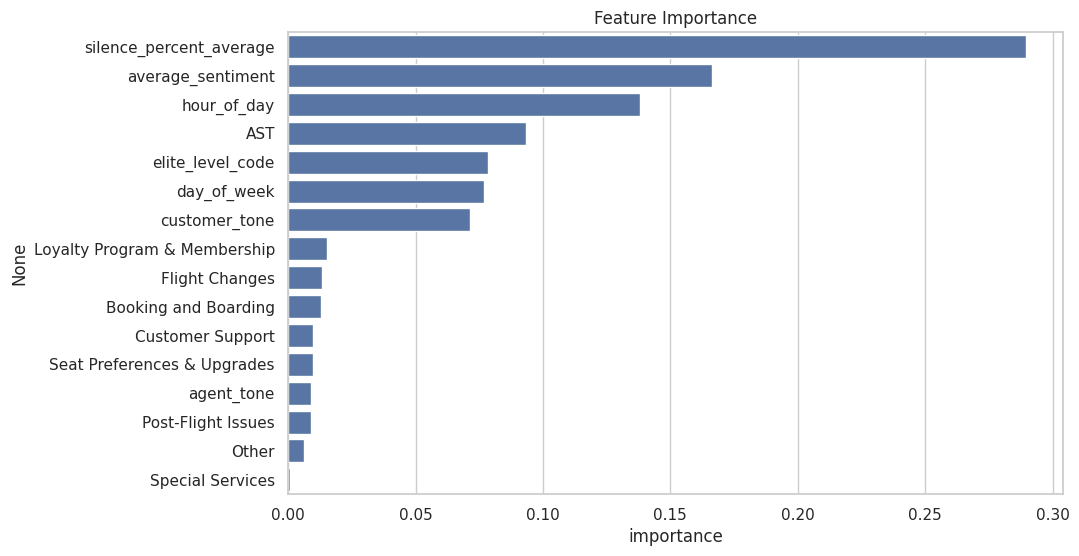

In [ ]:
# Feature importance

feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importance')
plt.show()

In [ ]:
X_ = df.drop(columns=['call_id', 'AST', 'call_start_datetime', 'agent_id','customer_id','agent_assigned_datetime','call_end_datetime','primary_call_reason','customer_name'],axis=1)
y_ = df['AST']

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 0.7303575599188904
Test RMSE: 1.914429038655935


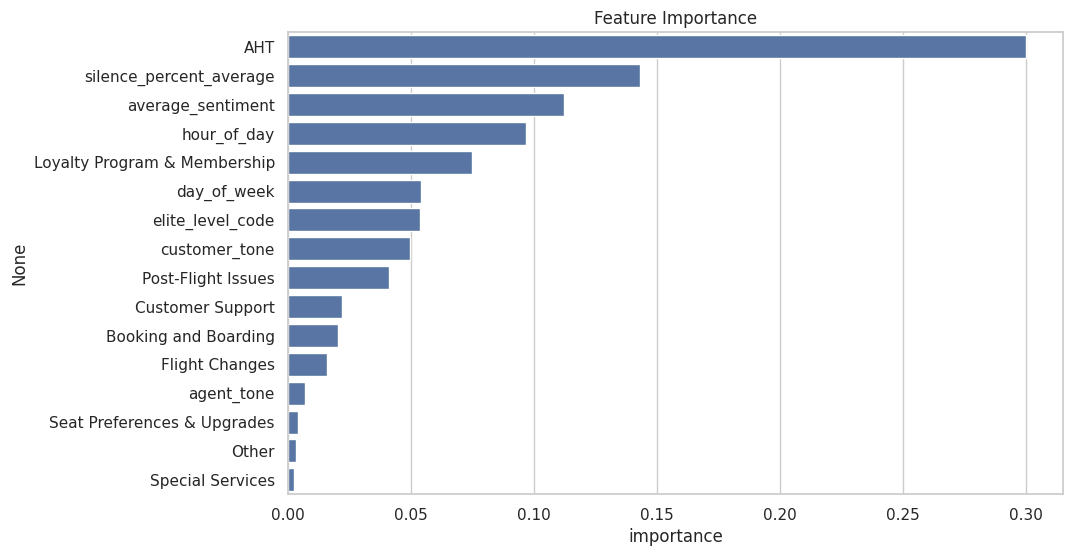

In [ ]:
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importance')
plt.show()

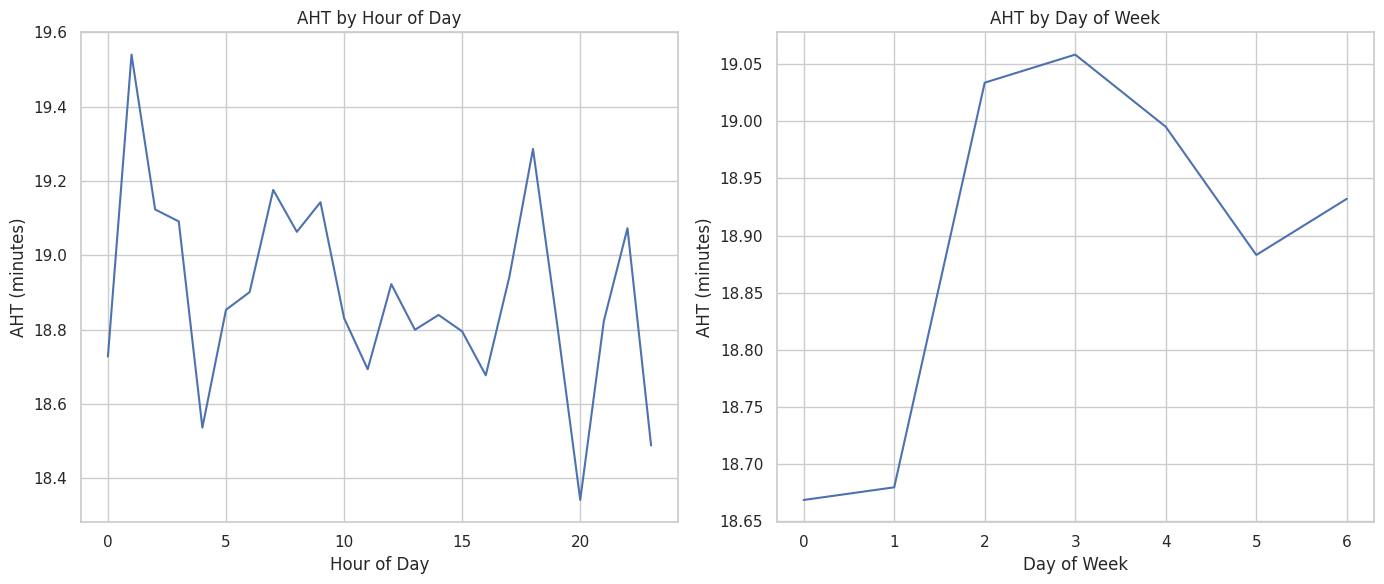

In [41]:
hourly_aht = df.groupby('hour_of_day')['AHT'].mean()

weekly_aht = df.groupby('day_of_week')['AHT'].mean()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x=hourly_aht.index, y=hourly_aht.values)
plt.xlabel('Hour of Day')
plt.ylabel('AHT (minutes)')
plt.title('AHT by Hour of Day')

plt.subplot(1, 2, 2)
sns.lineplot(x=weekly_aht.index, y=weekly_aht.values)
plt.xlabel('Day of Week')
plt.ylabel('AHT (minutes)')
plt.title('AHT by Day of Week')

plt.tight_layout()
plt.show()

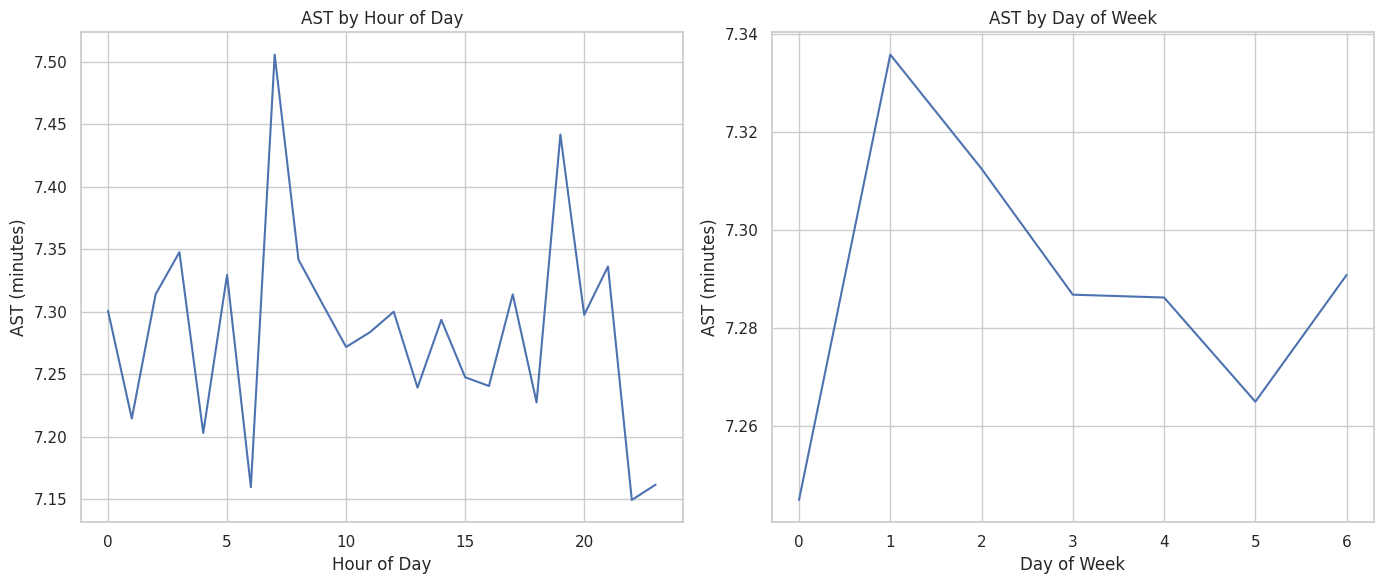

In [43]:
hourly_aht = df.groupby('hour_of_day')['AST'].mean()

weekly_aht = df.groupby('day_of_week')['AST'].mean()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x=hourly_aht.index, y=hourly_aht.values)
plt.xlabel('Hour of Day')
plt.ylabel('AST (minutes)')
plt.title('AST by Hour of Day')

plt.subplot(1, 2, 2)
sns.lineplot(x=weekly_aht.index, y=weekly_aht.values)
plt.xlabel('Day of Week')
plt.ylabel('AST (minutes)')
plt.title('AST by Day of Week')

plt.tight_layout()
plt.show()

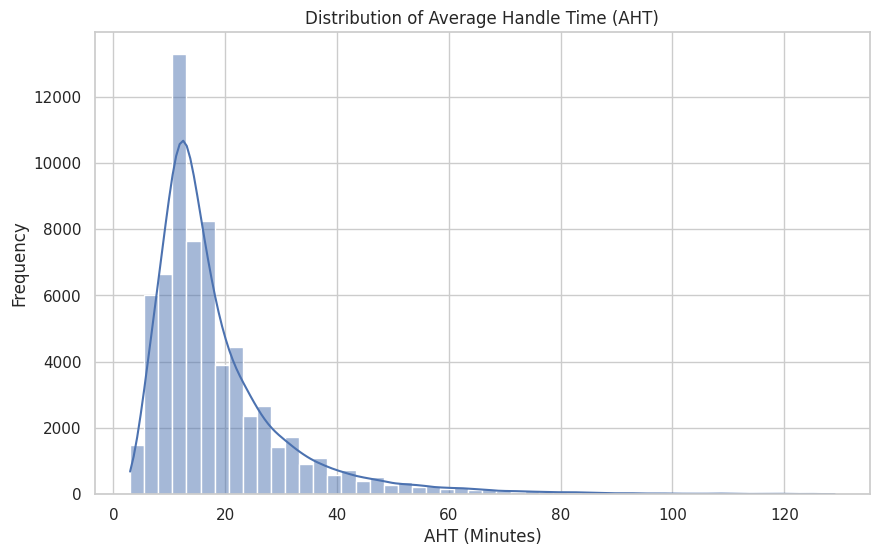

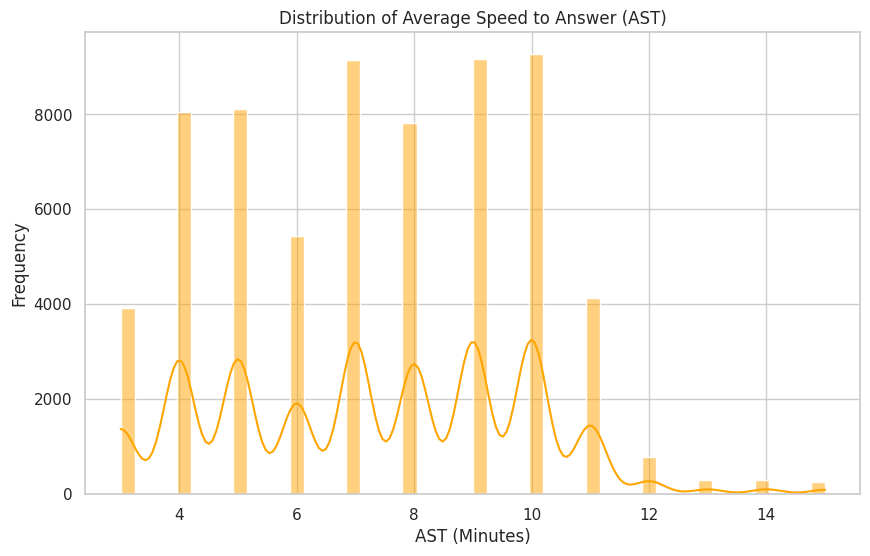

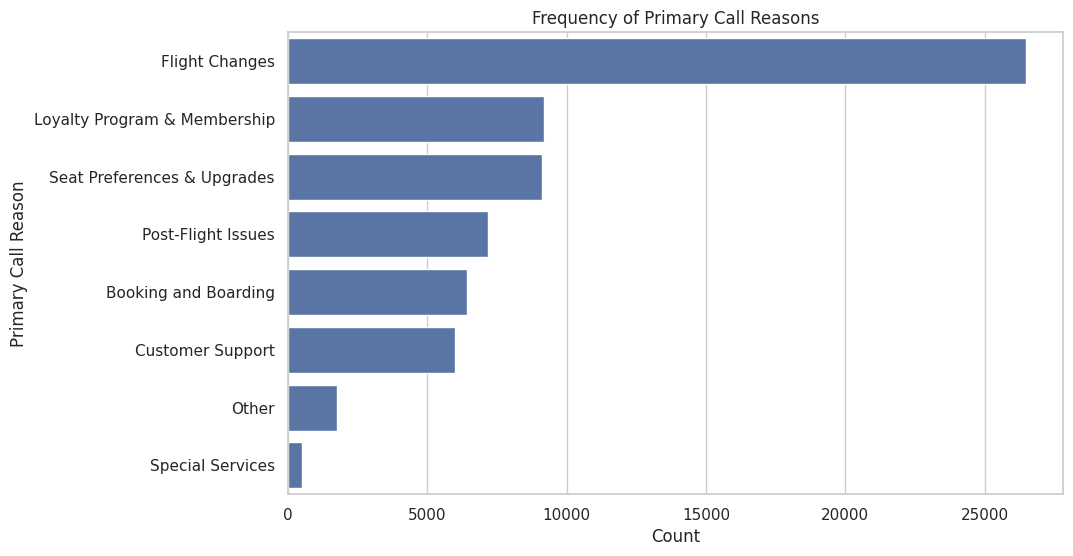

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


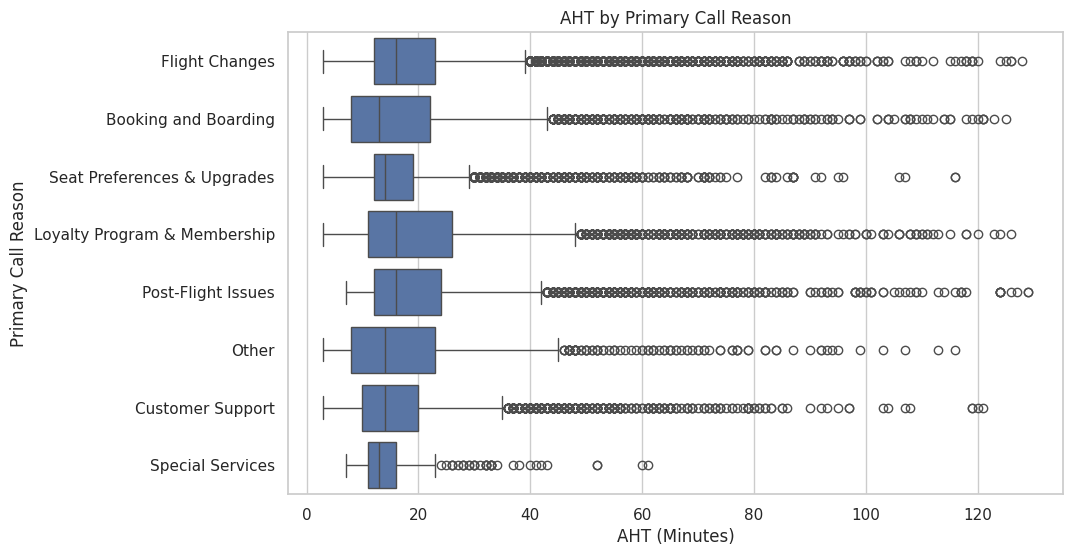

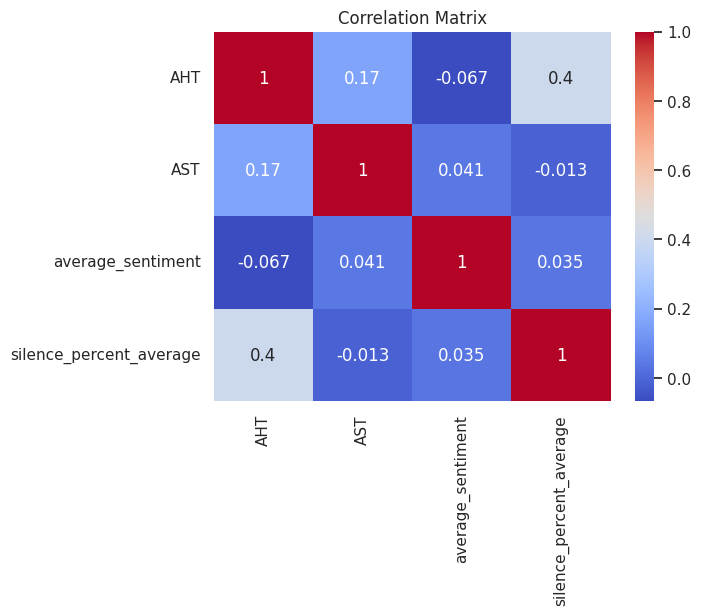

In [ ]:
# EDA Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(df['AHT'], bins=50, kde=True)
plt.title('Distribution of Average Handle Time (AHT)')
plt.xlabel('AHT (Minutes)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['AST'], bins=50, kde=True, color='orange')
plt.title('Distribution of Average Speed to Answer (AST)')
plt.xlabel('AST (Minutes)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='primary_call_reason', order=df['primary_call_reason'].value_counts().index)
plt.title('Frequency of Primary Call Reasons')
plt.xlabel('Count')
plt.ylabel('Primary Call Reason')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='primary_call_reason', x='AHT')
plt.title('AHT by Primary Call Reason')
plt.xlabel('AHT (Minutes)')
plt.ylabel('Primary Call Reason')
plt.show()

# Correlation Matrix
corr_matrix = df[['AHT', 'AST', 'average_sentiment', 'silence_percent_average']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()